!pip install labelme 


!pip install matplotlib

!pip install albumentations


In [2]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
num_images = 30


In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(num_images):
    print('Collecting image {}'.format(imgnum))
    ret , frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

!labelme

gawega

In [2]:
import tensorflow as tf
import json
import numpy as np 
from matplotlib import pyplot as plt

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [13]:
tf.test.is_gpu_available()

False

In [14]:
images = tf.data.Dataset.list_files('data\\images\\*.png',shuffle=False)

In [16]:
images.as_numpy_iterator().next()

b'data\\images\\57308c2f-10ef-11ee-84d5-ca43980af870.png'

In [4]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_png(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [30]:
images.as_numpy_iterator().next()

array([[[13, 28, 25],
        [12, 27, 24],
        [15, 27, 25],
        ...,
        [63, 60, 67],
        [63, 58, 65],
        [63, 58, 65]],

       [[14, 29, 26],
        [13, 28, 25],
        [15, 27, 25],
        ...,
        [62, 59, 66],
        [64, 59, 66],
        [64, 59, 66]],

       [[16, 28, 26],
        [16, 28, 26],
        [15, 27, 25],
        ...,
        [61, 58, 65],
        [61, 58, 65],
        [62, 59, 66]],

       ...,

       [[28, 38, 40],
        [28, 38, 40],
        [28, 38, 39],
        ...,
        [80, 89, 88],
        [80, 89, 88],
        [80, 89, 88]],

       [[27, 37, 38],
        [27, 37, 38],
        [26, 36, 37],
        ...,
        [78, 87, 86],
        [78, 87, 86],
        [78, 87, 86]],

       [[27, 37, 38],
        [26, 36, 37],
        [25, 35, 36],
        ...,
        [78, 87, 86],
        [77, 86, 85],
        [77, 86, 85]]], dtype=uint8)

In [31]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [32]:
image_generator = images.batch(4).as_numpy_iterator()

In [48]:
plot_images = image_generator.next()

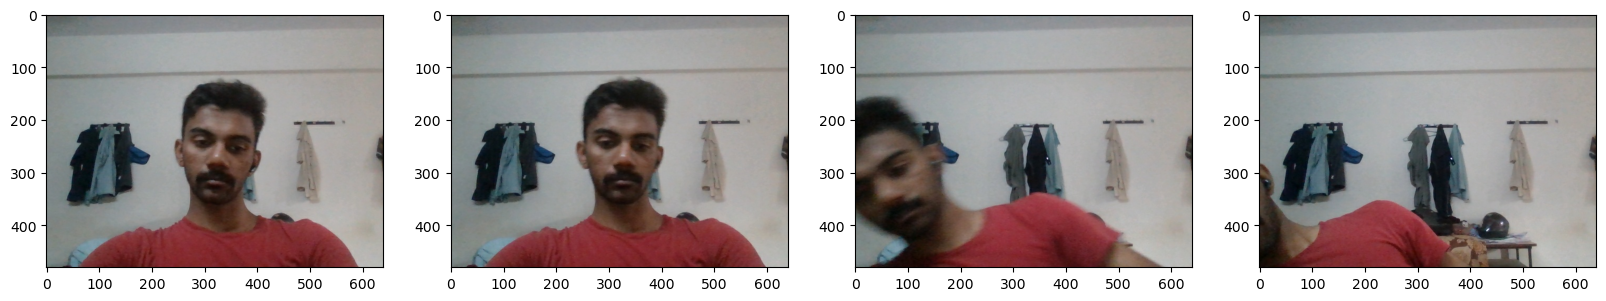

In [49]:
fig,ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

plt.show()

In [51]:
60*.7

42.0

In [52]:
60*.15

9.0

In [54]:
import shutil


In [55]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels')
            shutil.copy(existing_filepath, new_filepath)

In [56]:
import albumentations as alb

In [73]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
    alb.HorizontalFlip(p=.5),
    alb.RandomBrightnessContrast(p=.2),
    alb.RandomGamma(p=.2),
    alb.RGBShift(p=.2),
    alb.VerticalFlip(p=.5)],
    bbox_params=alb.BboxParams(format='albumentations',
                               label_fields=['class_labels']))


In [95]:
img = cv2.imread(os.path.join('data','train','images','5789dec8-10ef-11ee-81ad-ca43980af870.png'))

In [96]:
with open(os.path.join('data','train','labels','5789dec8-10ef-11ee-81ad-ca43980af870.json'),'r') as f:
    label = json.load(f)

In [97]:
label['shapes'][0]['points']

[[301.8840579710145, 160.77294685990339],
 [461.30434782608705, 368.9855072463768]]

In [98]:
cords = [0,0,0,0]
cords[0] =label['shapes'][0]['points'][0][0]
cords[1] =label['shapes'][0]['points'][0][1]
cords[2] =label['shapes'][0]['points'][1][0]
cords[3] =label['shapes'][0]['points'][1][1]

In [99]:
cords

[301.8840579710145, 160.77294685990339, 461.30434782608705, 368.9855072463768]

In [100]:
cords = list(np.divide(cords,[640,480,640,480]))

In [101]:
cords

[0.47169384057971014,
 0.33494363929146537,
 0.720788043478261,
 0.768719806763285]

In [102]:
augmentor

Compose([
  RandomCrop(always_apply=False, p=1.0, height=450, width=450),
  HorizontalFlip(always_apply=False, p=0.5),
  RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  RandomGamma(always_apply=False, p=0.2, gamma_limit=(80, 120), eps=None),
  RGBShift(always_apply=False, p=0.2, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
  VerticalFlip(always_apply=False, p=0.5),
], p=1.0, bbox_params={'format': 'albumentations', 'label_fields': ['class_labels'], 'min_area': 0.0, 'min_visibility': 0.0, 'min_width': 0.0, 'min_height': 0.0, 'check_each_transform': True}, keypoint_params=None, additional_targets={}, is_check_shapes=True)

In [103]:
augmented = augmentor(image=img, bboxes=[cords],class_labels=['face'])

In [104]:
augmented['bboxes']

[(0.37043478260869556,
  0.21558776167471816,
  0.7247020933977455,
  0.6782823403113258)]

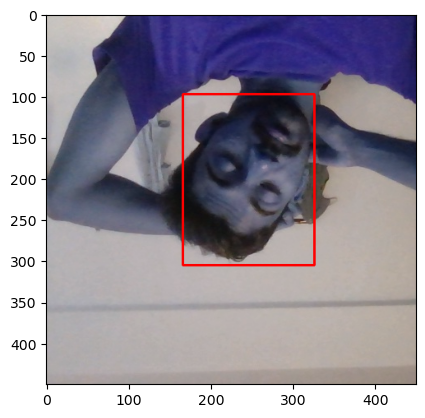

In [105]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])
              

step 5

In [106]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [3]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

NameError: name 'load_image' is not defined

In [5]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [109]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [110]:
train_images.as_numpy_iterator().next()


array([[[0.36770833, 0.39816177, 0.4126838 ],
        [0.36066177, 0.38903186, 0.40833333],
        [0.36911765, 0.3887255 , 0.40931374],
        ...,
        [0.02677696, 0.00716912, 0.        ],
        [0.01813726, 0.00931373, 0.0122549 ],
        [0.00404412, 0.00496324, 0.0098652 ]],

       [[0.3658088 , 0.3918505 , 0.4014706 ],
        [0.3726103 , 0.39221814, 0.40441176],
        [0.37340686, 0.3930147 , 0.40821078],
        ...,
        [0.04019608, 0.01911765, 0.00784314],
        [0.03621323, 0.01917892, 0.01470588],
        [0.02254902, 0.01960784, 0.02598039]],

       [[0.36568627, 0.38921568, 0.38921568],
        [0.3721201 , 0.39172795, 0.40349266],
        [0.3726103 , 0.39221814, 0.40398285],
        ...,
        [0.04356617, 0.01219363, 0.00042892],
        [0.03578432, 0.01470588, 0.00343137],
        [0.03719363, 0.01893382, 0.02120098]],

       ...,

       [[0.26960784, 0.2735294 , 0.28137255],
        [0.27009803, 0.2740196 , 0.28186274],
        [0.26917893, 0

In [111]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [112]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [113]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [114]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [115]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1958, 0.218 , 0.5728, 0.6787], dtype=float16))

In [116]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2520, 2520, 540, 540, 540, 540)

In [117]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [118]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [119]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [120]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0]], dtype=uint8),
 array([[0.352 , 0.3257, 0.7417, 0.7744],
        [0.1849, 0.1609, 0.626 , 0.689 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.2228, 0.2998, 0.664 , 0.828 ],
        [0.2252, 0.3196, 0.533 , 0.678 ],
        [0.336 , 0.1316, 0.745 , 0.7144],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [121]:
data_samples = train.as_numpy_iterator()

In [126]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


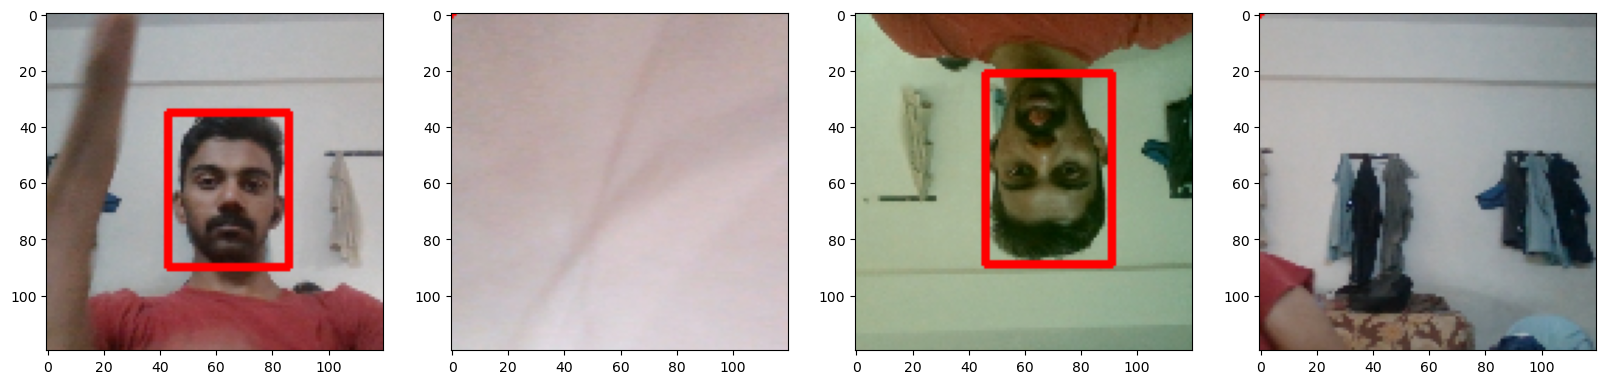

In [127]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

8. Build Deep Learning using the Functional API

In [128]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [129]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 28s 0us/step


In [130]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [131]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [132]:
facetracker = build_model()

In [133]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [134]:
X, y = train.as_numpy_iterator().next()

In [135]:
X.shape

(8, 120, 120, 3)

In [136]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 770ms/step


In [137]:
classes, coords

(array([[0.52432996],
        [0.5232599 ],
        [0.4667316 ],
        [0.42454496],
        [0.47511616],
        [0.5301754 ],
        [0.4271876 ],
        [0.46347678]], dtype=float32),
 array([[0.38429984, 0.5934199 , 0.3505443 , 0.50945795],
        [0.44321474, 0.64565676, 0.32965872, 0.3908711 ],
        [0.41123658, 0.6227589 , 0.3251884 , 0.4407762 ],
        [0.35199407, 0.6021335 , 0.37435457, 0.44944632],
        [0.40985948, 0.5365311 , 0.38889033, 0.44074184],
        [0.36843213, 0.49596626, 0.3355928 , 0.40748128],
        [0.3956333 , 0.6335619 , 0.41380093, 0.5012024 ],
        [0.3381198 , 0.6126886 , 0.3621185 , 0.4575286 ]], dtype=float32))

9. Define Losses and Optimizers

In [138]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [141]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)#legacy was added as it is depricated

In [142]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [143]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss


In [144]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.980771>

In [145]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7387903>

In [146]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.980771>

10. Train Neural Network

In [147]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [148]:
model = FaceTracker(facetracker)

In [149]:
model.compile(opt, classloss, regressloss)

In [150]:
logdir='logs'

In [151]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [152]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
315/315 [==============================] - 690s 2s/step - total_loss: 0.4762 - class_loss: 0.1273 - regress_loss: 0.4126 - val_total_loss: 0.0359 - val_class_loss: 0.0113 - val_regress_loss: 0.0302
Epoch 2/10
298/315 [===========================>..] - ETA: 36s - total_loss: 0.1353 - class_loss: 0.0407 - regress_loss: 0.1149

KeyboardInterrupt: 

In [2]:
from tensorflow.keras.models import load_model
import cv2

In [3]:
facetracker = load_model('facetracker.h5')

In [1]:
import numpy as np
import tensorflow as tf

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 78ms/step


In [13]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\jupyter\\face detect'

In [16]:
cap.release()
cv2.destroyAllWindows()